### Project - Term Deposit Subscription Prediction

Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio

#### Domain 
Banking and Finance

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Submitted by: Deep Singh Chauhan

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

#### Imported basic libraries

In [5]:
# importing dataframe called dfCustomers
dfCustomers = pd.read_csv('bank-full.csv')
dfCustomers.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
##Identify duplicates records in the data
dupes = dfCustomers.duplicated()
sum(dupes)

0

In [7]:
# share of data
dfCustomers.shape

(45211, 17)

In [8]:
dfCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### looking at info above we can say there is not null value in dataframe. all 17 columns has 45211 rows

In [9]:
# statistical summary of quantitative columns 
dfCustomers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
# checking total number of columns using another method
dfCustomers.isnull().sum().sum()

0

In [11]:
# converting datatype of object column to categorical datatype 
for feature in dfCustomers.columns: # Loop through all columns in the dataframe
    if dfCustomers[feature].dtype == 'object': # Only apply for columns with categorical strings
        dfCustomers[feature] = pd.Categorical(dfCustomers[feature])# Replace strings with an integer
dfCustomers.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [12]:
# verifying datatypes of all columns
dfCustomers.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [13]:
# finding missing values in discrete columns
print('Data shape:',dfCustomers.shape)
print('missing Age:', len(dfCustomers.loc[dfCustomers['age'] == 0]))
print('missing Balance:', len(dfCustomers.loc[dfCustomers['balance'] == 0]))
print('negative Balance:', len(dfCustomers.loc[dfCustomers['balance'] < 0]))
print('missing Day:', len(dfCustomers.loc[dfCustomers['day'] == 0]))
print('missing Duration:', len(dfCustomers.loc[dfCustomers['duration'] == 0]))
print('missing campaign:', len(dfCustomers.loc[dfCustomers['campaign'] == 0]))
print('missing pdays:', len(dfCustomers.loc[dfCustomers['pdays'] == 0]))
print('missing previous:', len(dfCustomers.loc[dfCustomers['previous'] == 0]))

Data shape: (45211, 17)
missing Age: 0
missing Balance: 3514
negative Balance: 3766
missing Day: 0
missing Duration: 3
missing campaign: 0
missing pdays: 0
missing previous: 36954


In [14]:
# balance column has 3514 missing values and 3766 customer has negative balance\n,
# duration column has 3 missing values
# previous column has 36954 missing values, this column has large no of missing values. 
#    I think its okay to ignore previous column in modeling.

In [15]:
# Replacing all the 0s in the column with the MEDIAN of the same column value accordingly
dfCustomers.loc[dfCustomers['balance'] == 0, 'balance'] = dfCustomers['balance'].median()
dfCustomers.loc[dfCustomers['duration'] == 0, 'duration'] = dfCustomers['duration'].median()

In [16]:
print(dfCustomers.job.value_counts())
print(dfCustomers.marital.value_counts())
print(dfCustomers.education.value_counts())
print(dfCustomers.default.value_counts())
print(dfCustomers.housing.value_counts())
print(dfCustomers.loan.value_counts())
print(dfCustomers.contact.value_counts())
print(dfCustomers.month.value_counts())
print(dfCustomers.poutcome.value_counts())
print(dfCustomers.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [17]:
print(dfCustomers.contact.value_counts(normalize=True))

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64


In [18]:
# job column has 288 missing values
# education column has 1857 missing values
# contact column has 13020 missing values
#     28% of data is missing is contact column, we will analyze more with respect of target column
# poutcome column has 36959 missing values
#     most of poutcome value is missing, so its better not to use this column in analysis and modeling

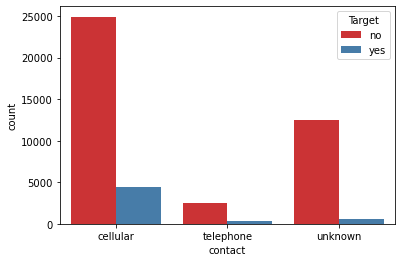

In [19]:
sns.countplot(data=dfCustomers, x='contact', hue='Target', palette='Set1')

In [20]:
# by looking at above analysis we can replace unknown value in contact column with cellular, i.e. mode of itself

In [21]:
# Replacing missing values in below column with the MODE of the same column value accordingly
dfCustomers.loc[dfCustomers['job'] == 'unknown', 'job'] = dfCustomers['job'].mode()
dfCustomers.loc[dfCustomers['education'] == 'unknown', 'education'] = dfCustomers['education'].mode()
dfCustomers.loc[dfCustomers['contact'] == 'unknown', 'contact'] = dfCustomers['contact'].mode()

In [22]:
dfCustomers.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13019
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
Target           0
dtype: int64

In [23]:
# Replacing missing values in below column with the MODE of the same column value accordingly
dfCustomers = dfCustomers.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [24]:
dfCustomers.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [25]:
dfCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  float64 
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  float64 
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), float64(2), int64(5)
memory usage: 2.8 MB


In [26]:
# checking statistical summary of quantitative columns 
dfCustomers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1397.092610,3031.520110,-8019.0,168.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.175024,257.520012,1.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


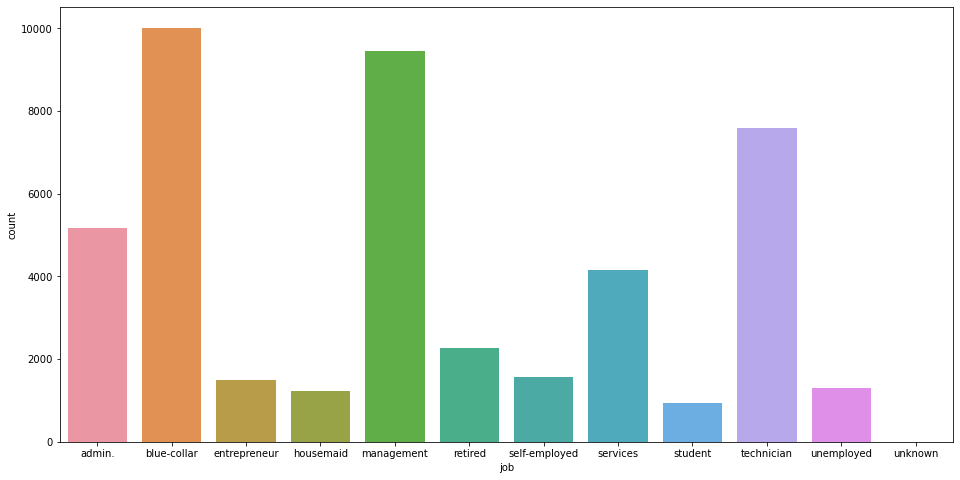

In [27]:
# job distribution
plt.figure(figsize=(16,8))
sns.countplot(data=dfCustomers, x='job')

#### most customer belong to blue collar, management and technicion job category

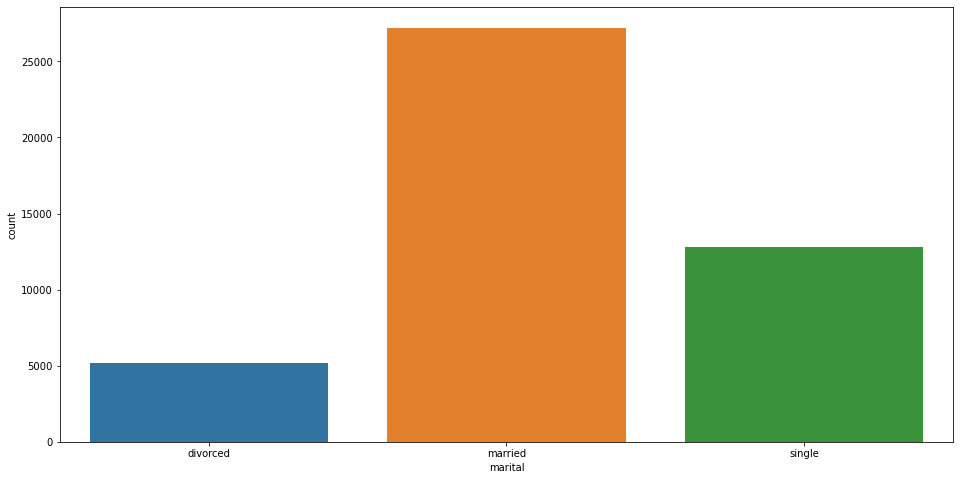

In [28]:
# marital distribution
plt.figure(figsize=(16,8))
sns.countplot(data=dfCustomers, x='marital')

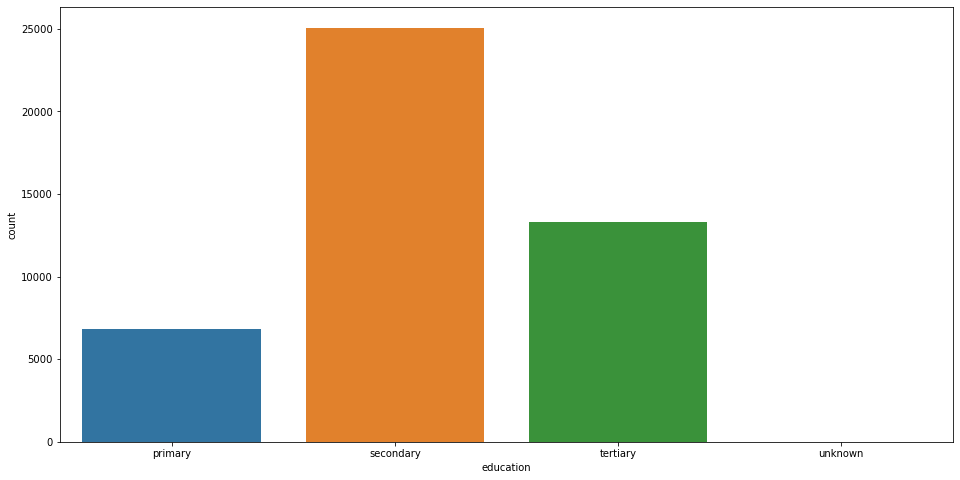

In [29]:
# education distribution
plt.figure(figsize=(16,8))
sns.countplot(data=dfCustomers, x='education')

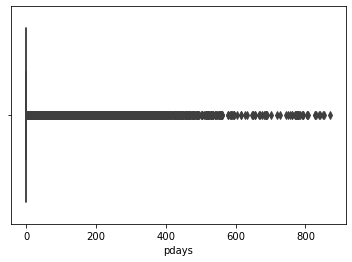

In [30]:
sns.boxplot(data=dfCustomers, x='pdays') 

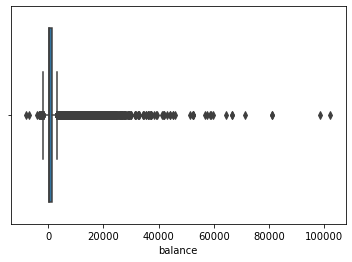

In [31]:
sns.boxplot(data=dfCustomers, x='balance')

In [32]:
# we have few outliers in balance column

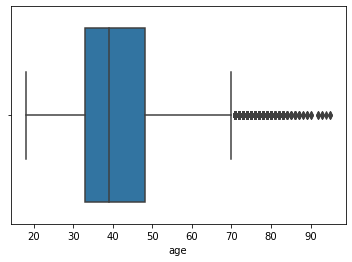

In [33]:
sns.boxplot(data=dfCustomers, x='age')

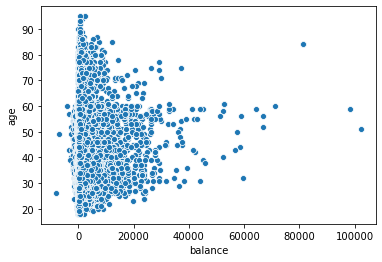

In [34]:
# distribution of balance v/s age
sns.scatterplot(data=dfCustomers, x='balance', y='age')

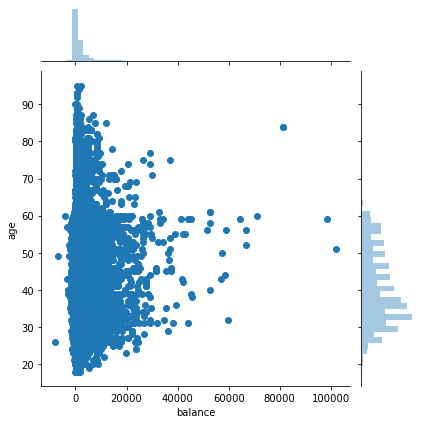

In [35]:
sns.jointplot(data=dfCustomers, x='balance', y='age')

In [36]:
# importing stats for calucating outliers
from scipy import stats
z = np.abs(stats.zscore(dfCustomers[['balance','age']]))
# z index on age and balance column
print(z)

[[0.24605334 1.60696496]
 [0.4512943  0.28852927]
 [0.46020082 0.74738448]
 ...
 [1.42435313 2.92540065]
 [0.24050663 1.51279098]
 [0.51918666 0.37068857]]


In [37]:
# setting threshold to 3
threshold = 3
np.where(z > threshold)

(array([   34,    69,   334, ..., 45141, 45191, 45204], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [38]:
print(z[34][0])

3.0473192390601205


In [39]:
# 34th and 69th record on column balance is an outlier.

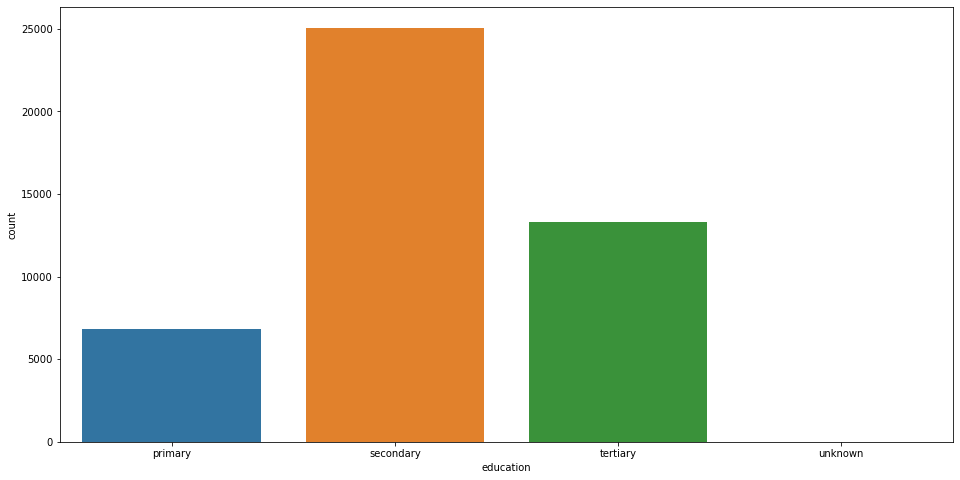

In [40]:
# education distribution
plt.figure(figsize=(16,8))
sns.countplot(data=dfCustomers, x='education')

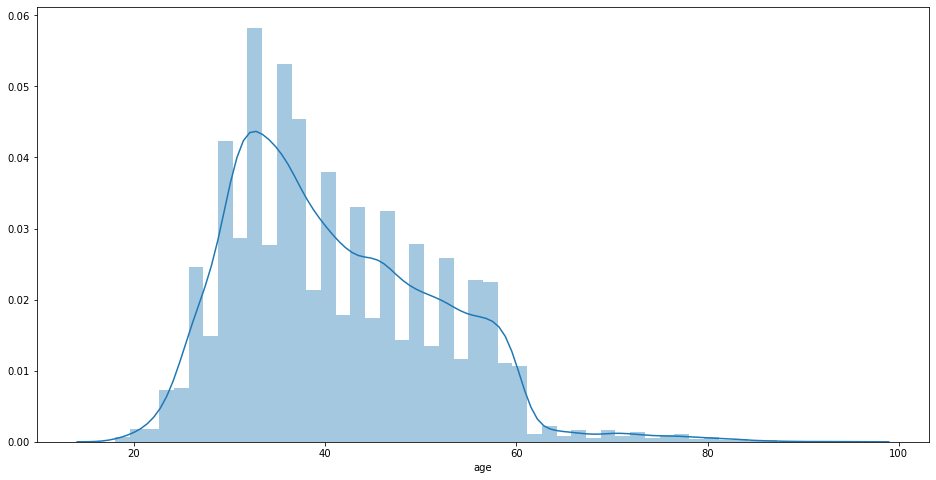

In [41]:
# age distribution
plt.figure(figsize=(16,8))
sns.distplot(dfCustomers['age'])

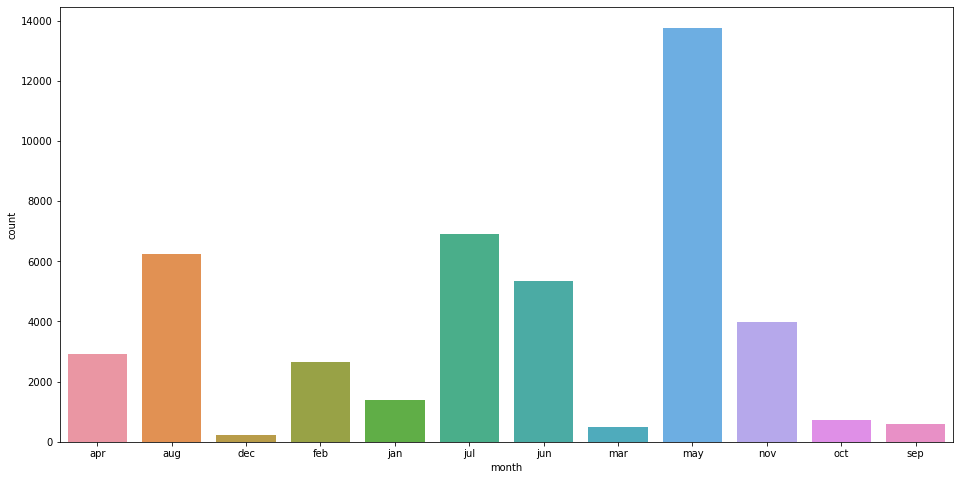

In [42]:
# Month distribution
plt.figure(figsize=(16,8))
sns.countplot(data=dfCustomers, x='month')
# most of customer contacted during May month

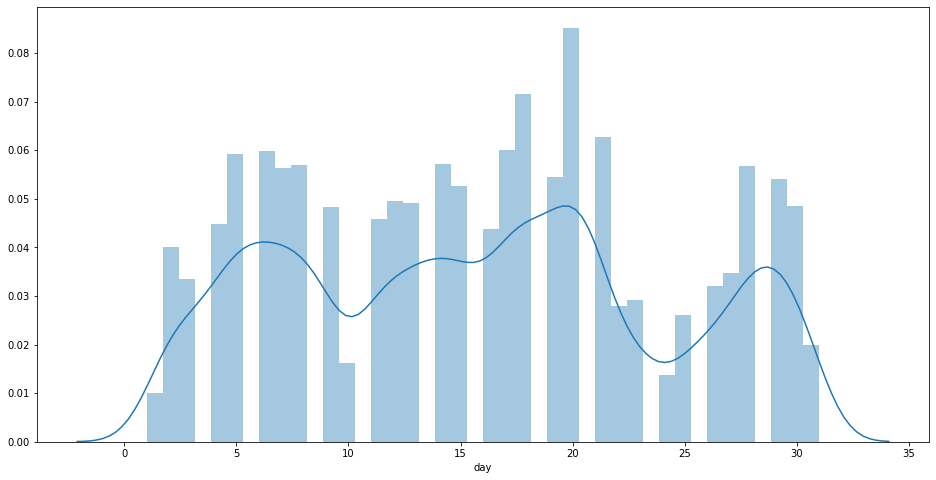

In [43]:
# date wise distribution
plt.figure(figsize=(16,8))
sns.distplot(dfCustomers['day'])
# most of customer were contacted during May month

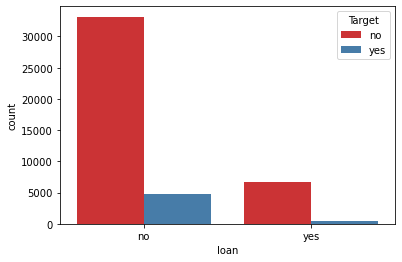

In [44]:
sns.countplot(data=dfCustomers, x='loan', hue='Target', palette='Set1')

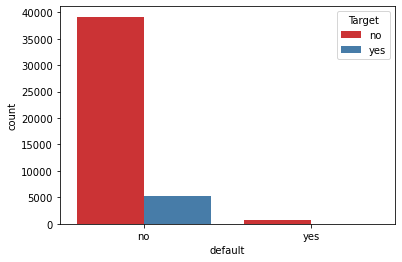

In [45]:
sns.countplot(data=dfCustomers, x='default', hue='Target', palette='Set1')

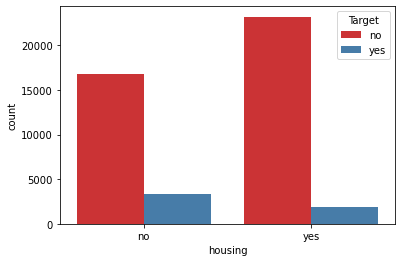

In [46]:
sns.countplot(data=dfCustomers, x='housing', hue='Target', palette='Set1')

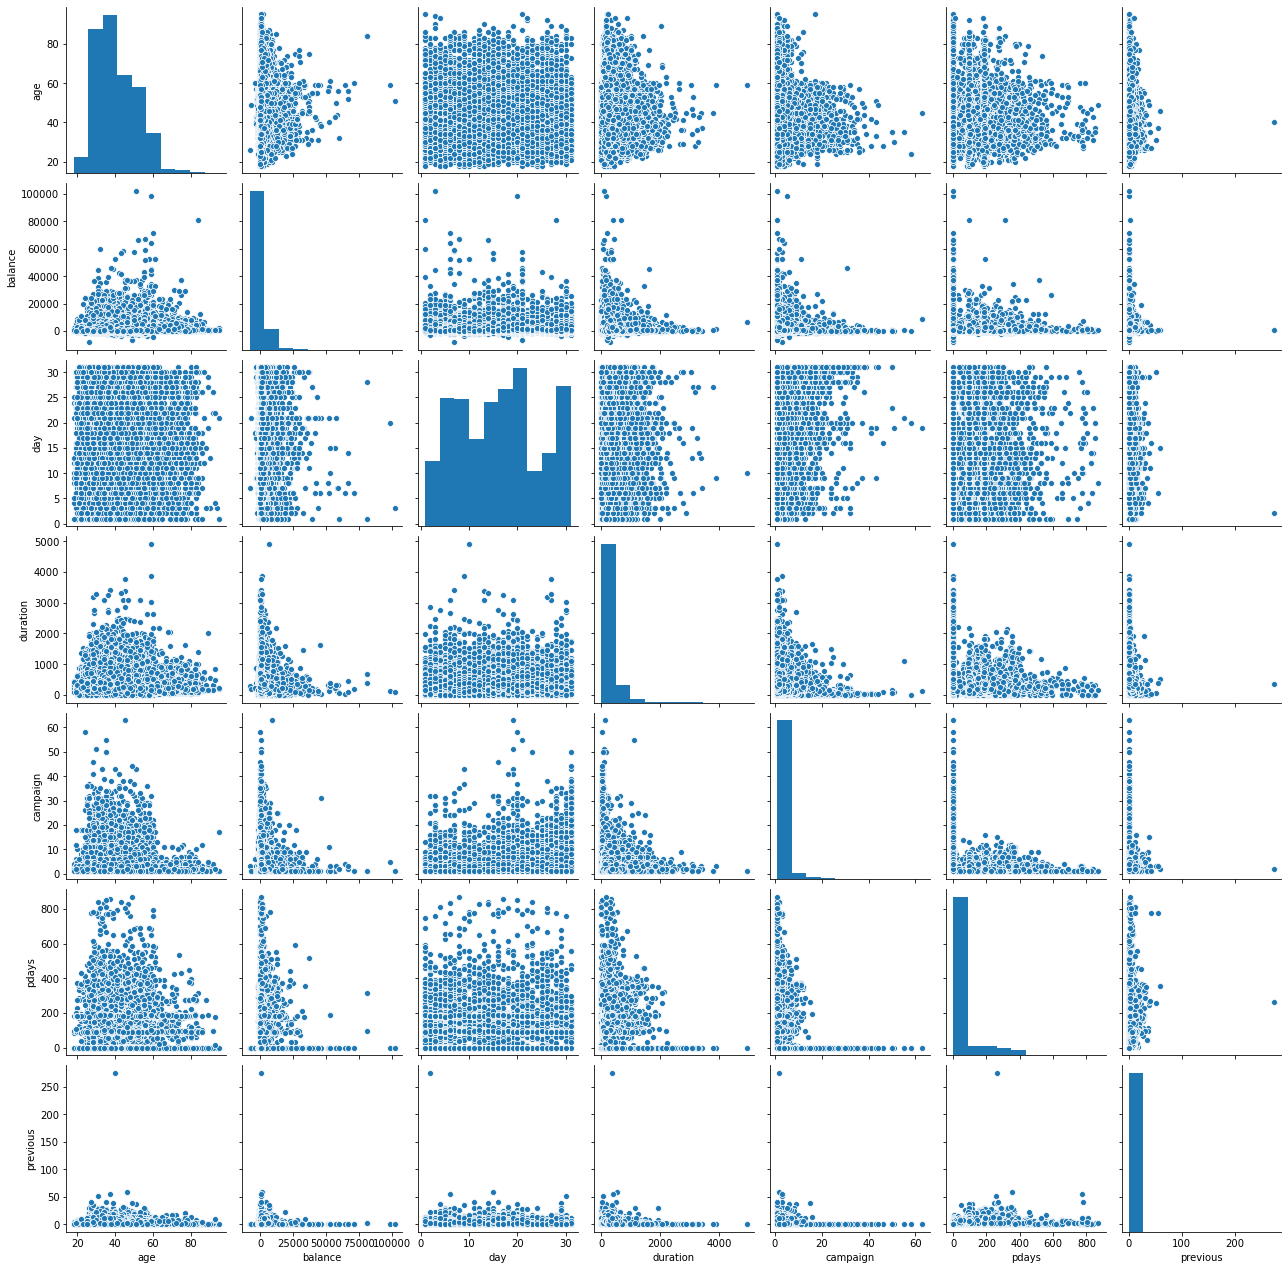

In [47]:
sns.pairplot(dfCustomers)

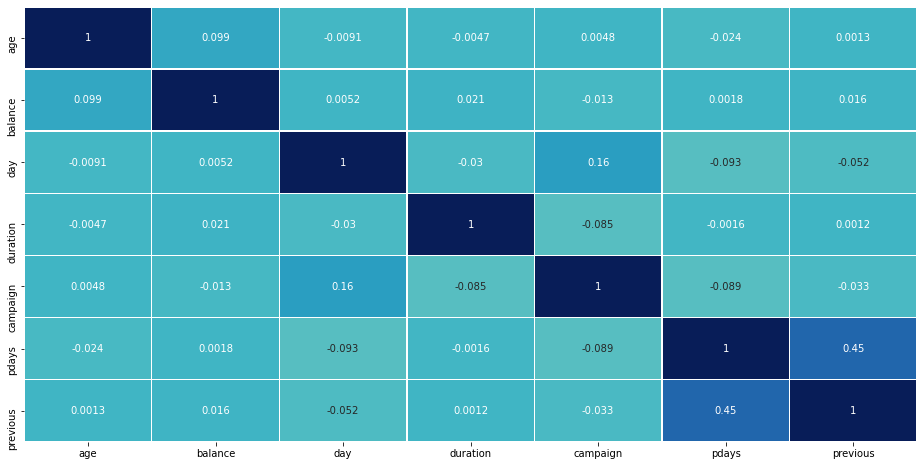

In [48]:
plt.figure(figsize=(16,8))
sns.heatmap(dfCustomers.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [49]:
# continous value coloumns are not much corelated

## Preparing the data for analytics

In [50]:
dfCustomers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143.0,yes,no,cellular,5,may,261.0,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,cellular,5,may,151.0,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,5,may,76.0,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506.0,yes,no,cellular,5,may,92.0,1,-1,0,unknown,no
4,33,blue-collar,single,secondary,no,1.0,no,no,cellular,5,may,198.0,1,-1,0,unknown,no


In [51]:
# dropping 'poutcome', 'previous', 'pdays' columns
dfCustomers.drop(['poutcome', 'previous', 'pdays'], axis=1, inplace=True)
dfCustomers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,Target
0,58,management,married,tertiary,no,2143.0,yes,no,cellular,5,may,261.0,1,no
1,44,technician,single,secondary,no,29.0,yes,no,cellular,5,may,151.0,1,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,5,may,76.0,1,no
3,47,blue-collar,married,secondary,no,1506.0,yes,no,cellular,5,may,92.0,1,no
4,33,blue-collar,single,secondary,no,1.0,no,no,cellular,5,may,198.0,1,no


In [52]:
replaceStruct = {
                "education":     {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":-1}
                }
oneHotCols=["job","marital","default","housing","loan", "contact","month","Target"]

In [53]:
dfCustomers=dfCustomers.replace(replaceStruct)
dfCustomers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,Target
0,58,management,married,3,no,2143.0,yes,no,cellular,5,may,261.0,1,no
1,44,technician,single,2,no,29.0,yes,no,cellular,5,may,151.0,1,no
2,33,entrepreneur,married,2,no,2.0,yes,yes,cellular,5,may,76.0,1,no
3,47,blue-collar,married,2,no,1506.0,yes,no,cellular,5,may,92.0,1,no
4,33,blue-collar,single,2,no,1.0,no,no,cellular,5,may,198.0,1,no


In [54]:
dfCustomers = pd.get_dummies(dfCustomers, columns=oneHotCols, drop_first=True)
dfCustomers.head()

,age,education,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,Target_yes
0,58,3,2143.0,5,261.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,44,2,29.0,5,151.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,33,2,2.0,5,76.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,47,2,1506.0,5,92.0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,33,2,1.0,5,198.0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [55]:
dfCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  int64  
 1   education          45211 non-null  int64  
 2   balance            45211 non-null  float64
 3   day                45211 non-null  int64  
 4   duration           45211 non-null  float64
 5   campaign           45211 non-null  int64  
 6   job_blue-collar    45211 non-null  uint8  
 7   job_entrepreneur   45211 non-null  uint8  
 8   job_housemaid      45211 non-null  uint8  
 9   job_management     45211 non-null  uint8  
 10  job_retired        45211 non-null  uint8  
 11  job_self-employed  45211 non-null  uint8  
 12  job_services       45211 non-null  uint8  
 13  job_student        45211 non-null  uint8  
 14  job_technician     45211 non-null  uint8  
 15  job_unemployed     45211 non-null  uint8  
 16  job_unknown        452

In [56]:
# features and target variables setup
X = dfCustomers.drop('Target_yes', axis=1)
y = dfCustomers['Target_yes']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [59]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(dfCustomers.loc[dfCustomers['Target_yes'] == 1]), (len(dfCustomers.loc[dfCustomers['Target_yes'] == 1])/len(dfCustomers.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(dfCustomers.loc[dfCustomers['Target_yes'] == 0]), (len(dfCustomers.loc[dfCustomers['Target_yes'] == 0])/len(dfCustomers.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 5289 (11.70%)
Original Target False Values   : 39922 (88.30%)

Training Target True Values    : 3692 (11.67%)
Training Target False Values   : 27955 (88.33%)

Test Target True Values        : 1597 (11.77%)
Test Target False Values       : 11967 (88.23%)



### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

# Fit the model on train using liblinear 
lrModel = LogisticRegression(solver="liblinear")
lrModel.fit(X_train, y_train)
#predict on test
pred = lrModel.predict(X_test)


coef_df = pd.DataFrame(lrModel.coef_)
coef_df['intercept'] = lrModel.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.000941  0.221925  0.000013  0.001547  0.003842 -0.114083 -0.361808   

          7         8         9  ...        26        27        28      29  \
0 -0.423654 -0.644261 -0.137205  ... -0.291709 -1.224078 -0.983272 -0.8417   

         30        31        32        33        34  intercept  
0  1.353569 -1.148257 -0.948011  0.700451  0.777812  -2.176799  

[1 rows x 36 columns]


In [61]:
model_score = lrModel.score(X_test, y_test)
print('Logistic Regression score: ',model_score)

Logistic Regression score:  0.896638159834857


In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

Logistic Regression confusion matrix


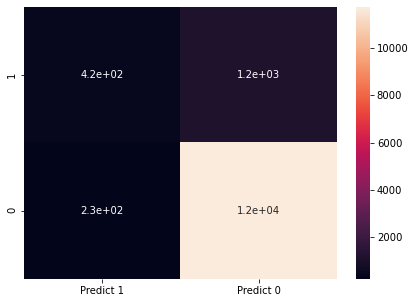

In [63]:
print('Logistic Regression confusion matrix')
cm=confusion_matrix(y_test, pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [64]:
print('Logistic Regression classification report')
print(classification_report(y_test, pred))

Logistic Regression classification report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11967
           1       0.65      0.27      0.38      1597

    accuracy                           0.90     13564
   macro avg       0.78      0.62      0.66     13564
weighted avg       0.88      0.90      0.88     13564



In [65]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.896638159834857

In [66]:
# creating accuracy dataframe to store different model performance for later comparision
accuracyDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': accuracy})
accuracyDf

,Method,accuracy
0,Logistic Regression,0.896638


### Decision Tree algorithm

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dtreeModel = DecisionTreeClassifier(criterion='entropy')

In [69]:
dtreeModel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [70]:
pred =  dtreeModel.predict(X_test)

Decision Tree with no pruning confusion matrix


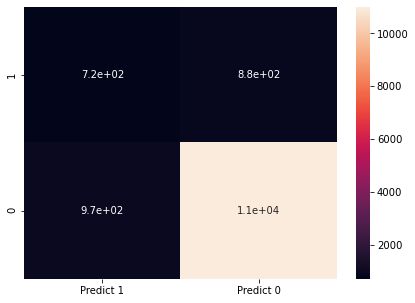

In [71]:
print('Decision Tree with no pruning confusion matrix')
cm=confusion_matrix(y_test, pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [72]:
print('Decision Tree with no pruning classification report')
print(classification_report(y_test, pred))

Decision Tree with no pruning classification report
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11967
           1       0.42      0.45      0.44      1597

    accuracy                           0.86     13564
   macro avg       0.68      0.68      0.68     13564
weighted avg       0.87      0.86      0.87     13564



In [73]:
print("Decision Tree: %.2f" % dtreeModel.score(X_train, y_train))  # performance on train data
print("Decision Test: %.2f" % dtreeModel.score(X_test, y_test))  # performance on test data

Decision Tree: 1.00
Decision Test: 0.86


In [74]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.8635358301386021

In [75]:
tempaccr = pd.DataFrame({'Method':['Not Pruned Decision Tree'], 'accuracy': [accuracy]})
accuracyDf = pd.concat([accuracyDf, tempaccr])
accuracyDf

,Method,accuracy
0,Logistic Regression,0.896638
0,Not Pruned Decision Tree,0.863536


In [76]:
# looking at the scores we can say model is overfitted so we will prune 

### Pruned Decision Tree algorithm

In [77]:
dtree_prunedModel = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
dtree_prunedModel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [78]:
print("Train: %.2f" % dtree_prunedModel.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % dtree_prunedModel.score(X_test, y_test))  # performance on test data

Train: 0.89
Test: 0.89


In [79]:
# after trying different max_depth and checking train and test score, max_depth value 3 is best for pruning 

In [80]:
pred =  dtree_prunedModel.predict(X_test)

Pruned Decision Tree confusion matrix


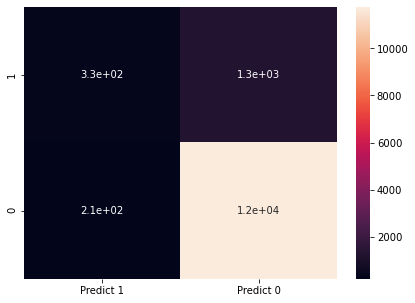

In [81]:
print('Pruned Decision Tree confusion matrix')
cm=confusion_matrix(y_test, pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [82]:
print('Pruned Decision Tree classification report')
print(classification_report(y_test, pred))

Pruned Decision Tree classification report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11967
           1       0.61      0.21      0.31      1597

    accuracy                           0.89     13564
   macro avg       0.76      0.59      0.63     13564
weighted avg       0.87      0.89      0.87     13564



In [83]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.8913299911530522

In [84]:
tempaccr = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [accuracy]})
accuracyDf = pd.concat([accuracyDf, tempaccr])
accuracyDf

,Method,accuracy
0,Logistic Regression,0.896638
0,Not Pruned Decision Tree,0.863536
0,Pruned Decision Tree,0.891330


## Ensemble Techniques

### Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)
pred = rfcl.predict(X_test)

In [87]:
print("Train: %.2f" % rfcl.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % rfcl.score(X_test, y_test))  # performance on test data
print ('accuracy score:',accuracy_score(y_test, pred))

Train: 1.00
Test: 0.90
accuracy score: 0.898997345915659


In [88]:
# Model looks overfitted so Reduce Overfitting by trying different parameter
rfcl = RandomForestClassifier(n_estimators = 75,random_state=12,max_depth=3,criterion="entropy")
rfcl = rfcl.fit(X_train, y_train)
pred = rfcl.predict(X_test)

In [89]:
print("Train: %.2f" % rfcl.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % rfcl.score(X_test, y_test))  # performance on test data
print ('accuracy score:',accuracy_score(y_test, pred))

Train: 0.88
Test: 0.88
accuracy score: 0.882261869654969


In [90]:
print('Random Forest Classifier classification report')
print(classification_report(y_test, pred))

Random Forest Classifier classification report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11967
           1       0.00      0.00      0.00      1597

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.882261869654969

In [92]:
tempaccr = pd.DataFrame({'Method':['Random Forest - Entropy'], 'accuracy': [accuracy]})
accuracyDf = pd.concat([accuracyDf, tempaccr])
accuracyDf

,Method,accuracy
0,Logistic Regression,0.896638
0,Not Pruned Decision Tree,0.863536
0,Pruned Decision Tree,0.891330
0,Random Forest - Entropy,0.882262


### Bagging Classifier

In [93]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),n_estimators=75, max_samples= .7, bootstrap=True, oob_score=True, random_state=12)
bgcl = bgcl.fit(X_train, y_train)
pred = bgcl.predict(X_test)

In [94]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.8916248894131524

In [95]:
print('Bagging Classifier classification report')
print(classification_report(y_test, pred))

Bagging Classifier classification report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11967
           1       0.62      0.21      0.31      1597

    accuracy                           0.89     13564
   macro avg       0.76      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



In [96]:
tempaccr = pd.DataFrame({'Method':['Bagging Regularised'], 'accuracy': [accuracy]})
accuracyDf = pd.concat([accuracyDf, tempaccr])
accuracyDf

,Method,accuracy
0,Logistic Regression,0.896638
0,Not Pruned Decision Tree,0.863536
0,Pruned Decision Tree,0.891330
0,Random Forest - Entropy,0.882262
0,Bagging Regularised,0.891625


### AdaBoosting Classifier

In [97]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
# tried with 10 estimator but 50 is better
abcl = abcl.fit(X_train, y_train)
pred = abcl.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.8940578000589796

In [98]:
print('AdaBoosting Classifier classification report')
print(classification_report(y_test, pred))

AdaBoosting Classifier classification report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11967
           1       0.60      0.31      0.40      1597

    accuracy                           0.89     13564
   macro avg       0.76      0.64      0.67     13564
weighted avg       0.88      0.89      0.88     13564



In [99]:
tempaccr = pd.DataFrame({'Method':['AdaBoosting'], 'accuracy': [accuracy]})
accuracyDf = pd.concat([accuracyDf, tempaccr])
accuracyDf

,Method,accuracy
0,Logistic Regression,0.896638
0,Not Pruned Decision Tree,0.863536
0,Pruned Decision Tree,0.891330
0,Random Forest - Entropy,0.882262
0,Bagging Regularised,0.891625
0,AdaBoosting,0.894058


### GradientBoost Classifier 

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
#gbcl = GradientBoostingClassifier(n_estimators = 10,random_state=1)
#gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = GradientBoostingClassifier(n_estimators = 75,random_state=1)
# tried with 10 and 50 estimator but 75 looks better accurate

gbcl = gbcl.fit(X_train, y_train)
pred = gbcl.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.8998820406959599

In [101]:
print('GradientBoost Classifier classification report')
print(classification_report(y_test, pred))

GradientBoost Classifier classification report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11967
           1       0.65      0.32      0.43      1597

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564



In [102]:
tempaccr = pd.DataFrame({'Method':['GradientBoost'], 'accuracy': [accuracy]})
accuracyDf = pd.concat([accuracyDf, tempaccr])
accuracyDf

,Method,accuracy
0,Logistic Regression,0.896638
0,Not Pruned Decision Tree,0.863536
0,Pruned Decision Tree,0.891330
0,Random Forest - Entropy,0.882262
0,Bagging Regularised,0.891625
0,AdaBoosting,0.894058
0,GradientBoost,0.899882


## Conclusion

After trying mutliple algorithms and caculating scores, I can say, we should build our model using ensemble technique with Gradient boosting for this business case to predict the loan compain. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Assignment Completed

Project work is checked in to github on below path:

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-deepkanpur